# Gaussian Blur
Blurring an image can be done by reducing the level of noise in the image by applying a filter to an image. Image blurring is one of the important aspects of image processing.

The ImageFilter class in the Pillow library provides several standard image filters. Image filters can be applied to an image by calling the filter() method of Image object with required filter type as defined in the ImageFilter class.

This filter also uses parameter radius and does the same work as box blur with some algorithmic changes. In short, changing the radius value, will generate different intensity of ‘Gaussianblur’ images.

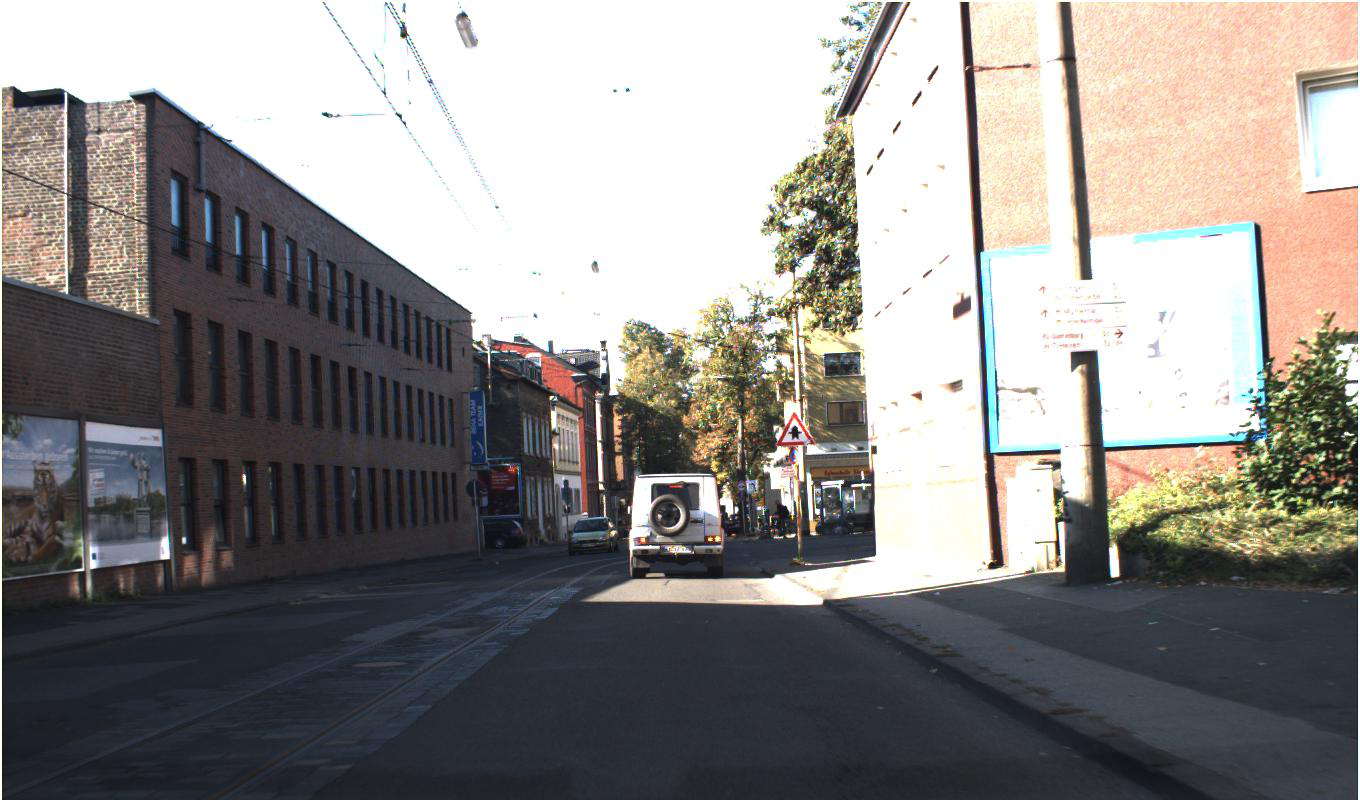

In [2]:
from PIL import Image, ImageFilter

origImage = Image.open("../data/datasets/gtsdb/train/images/00000.jpg")
display(origImage)

Blurring the image, radius is proportional to the intensity of the blur that is applied.

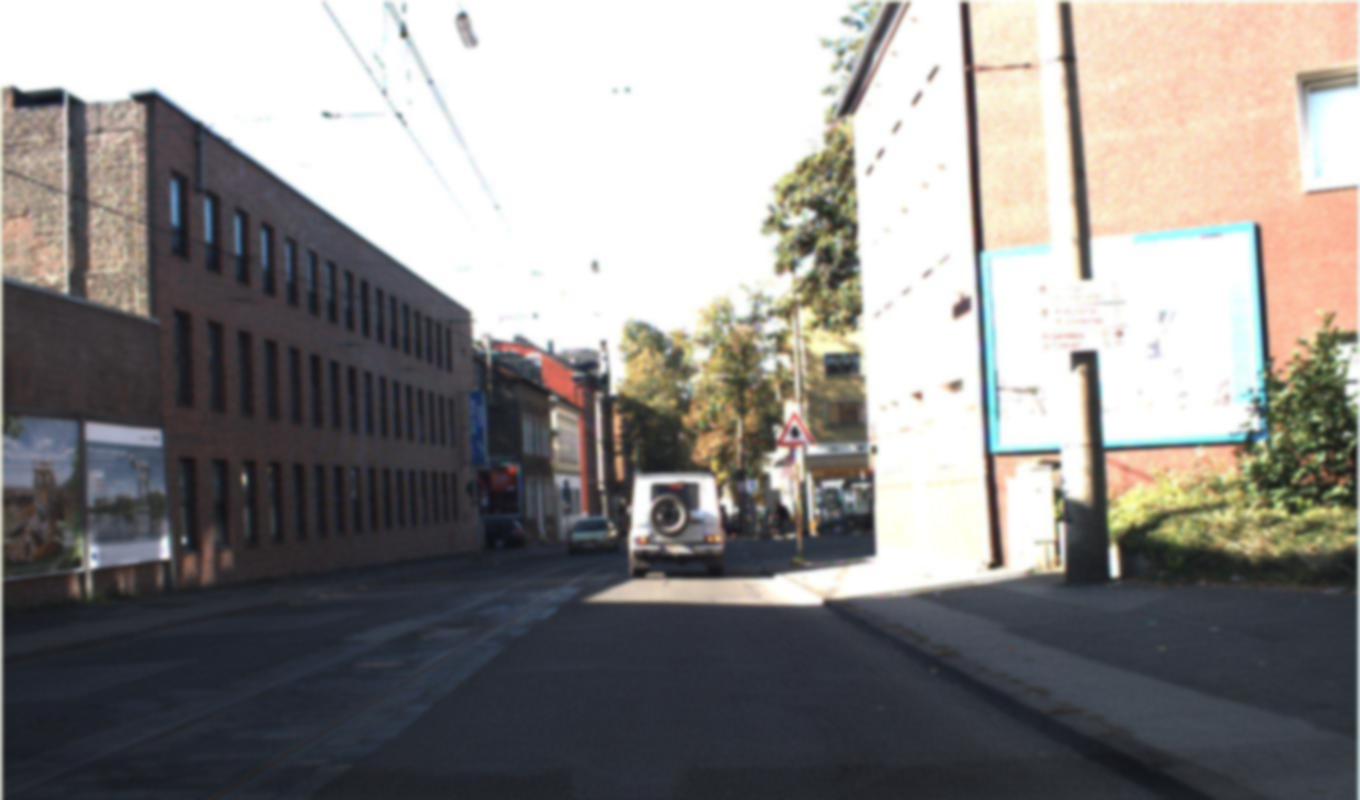

In [3]:
gauss_Image = origImage.filter(ImageFilter.GaussianBlur(radius=2))
display(gauss_Image)

# Noise
## Gaussian noise
Image noise is a random variation in the intensity values. Thus, by randomly inserting some values in an image, we can reproduce any noise pattern.

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mimage
import cv2

Try loading an image with different APIs, as I experienced Problems with displaying images in Pycharm. In VS Code, as shown below, it works as expected.

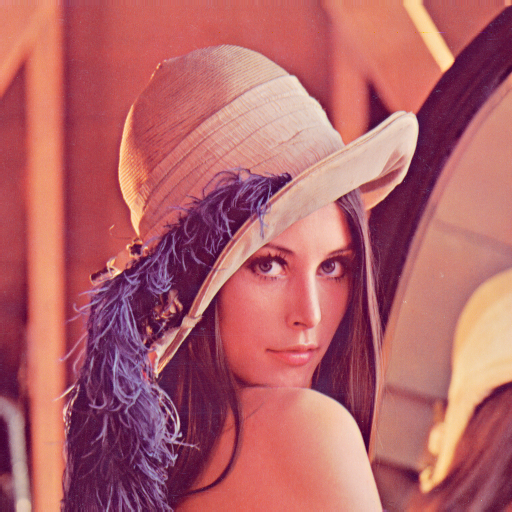

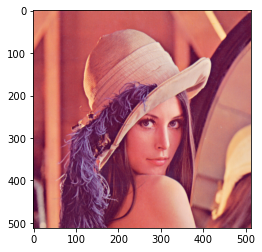

In [5]:
lenna = Image.open("../Lenna_(test_image).png")
display(lenna)
im_array = np.array(lenna)
plt.imshow(lenna)

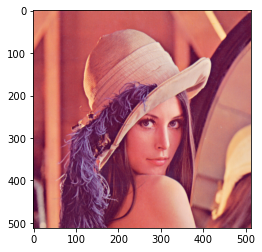

In [6]:
lenna_mimage = mimage.imread("../Lenna_(test_image).png")
plt.imshow(lenna_mimage)

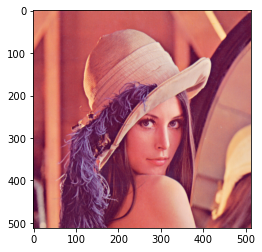

In [7]:
cv_image = cv2.imread("../Lenna_(test_image).png")
RGB_im = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_im)

In [8]:
print(im_array.shape)
print(im_array)

(512, 512, 3)
[[[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 ...

 [[ 84  18  60]
  [ 84  18  60]
  [ 92  27  58]
  ...
  [173  73  84]
  [172  68  76]
  [177  62  79]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]]


In [9]:
gauss = np.random.normal(0,1,cv_image.size)
gauss = gauss.reshape(cv_image.shape[0],cv_image.shape[1],cv_image.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(cv_image,gauss)

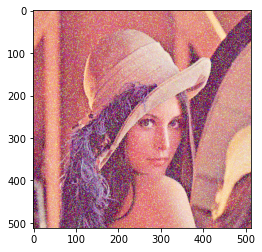

In [10]:
RGB_gaussian_noise_im = cv2.cvtColor(img_gauss, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_gaussian_noise_im)

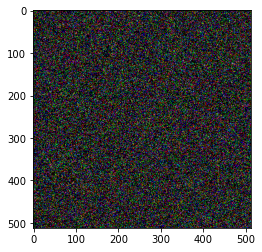

In [11]:
plt.imshow(gauss)

## Salt and Pepper Noise
Salt-and-pepper noise is  a sparsely occurring  white and  black pixels sometimes  seen on images. The Salt & Pepper  noise is generally  caused by  defect of  camera sensor,  software failure,  or hardware failure  in  image  capturing  or  transmission. Due  to  this  situation,  Salt  & Pepper  noise  model,  only  a 
proportion of all the image pixels are corrupted whereas other pixels are non-noisy [12]. A standard Salt & 
Pepper noise value may be either minimum (0) or maximum (255). The typical intensity value for pepper 
noise is close to 0 and for salt noise is close to 255. Furthermore, the unaffected pixels remain unchanged. 

\begin{equation}
    \eta(x,y) = 
    \begin{cases}
        0, \text{Pepper noise} \\
        255, \text{Salt noise}
    \end{cases}
\end{equation}
Source: [researchgate - Salt and Pepper Noise Effects and Removal](https://www.researchgate.net/publication/326408527_Salt_and_Pepper_Noise_Effects_and_Removal)

In [12]:
pixel = (
    np.random.randint(0, 10),
    np.random.randint(0, 10)
    )
pixel

(4, 6)

In [19]:
def draw_pixel(already_perturbed_pixels, rows, cols):
    new_Pixel = False
    while(not new_Pixel):
        pixel = (
            np.random.randint(0, rows),
            np.random.randint(0, cols)
            )
        if pixel not in already_perturbed_pixels: new_Pixel = True
    return pixel

# frac: Der Anteil der Pixel der gestört werden soll; image: Numpy Array of shape (row, col, 3)
def add_salt_and_pepper(frac, image):
    row, col, _ = image.shape
    perturbed_image = image.copy()
    already_perturbed_pixels = set()
    for i in range(int(row * col * frac)):
        pixel = draw_pixel(already_perturbed_pixels=already_perturbed_pixels, rows=row, cols=col)
        already_perturbed_pixels.add(pixel)
        perturbed_image[pixel[0], pixel[1]] = [255,255,255] if(np.random.randint(0,2)) else [0,0,0]
    return perturbed_image

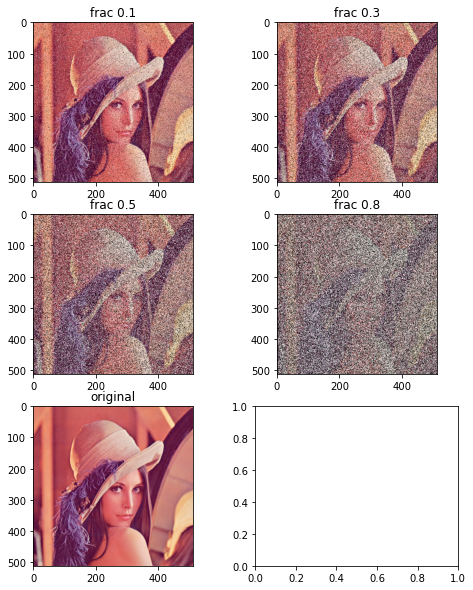

In [55]:
image_bgr = cv2.imread("../Lenna_(test_image).png")
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(3,2, figsize=(8, 10))
axs[0,0].imshow(add_salt_and_pepper(frac=0.1, image=image))
axs[0,0].set_title("frac 0.1")
axs[0,1].imshow(add_salt_and_pepper(frac=0.3, image=image))
axs[0,1].set_title("frac 0.3")
axs[1,0].imshow(add_salt_and_pepper(frac=0.5, image=image))
axs[1,0].set_title("frac 0.5")
axs[1,1].imshow(add_salt_and_pepper(frac=0.8, image=image))
axs[1,1].set_title("frac 0.8")
axs[2,0].imshow(image)
axs[2,0].set_title("original")
plt.show()

# Aufhellen & Abdunkeln
Die Bild Helligkeit und der Bildkontrast werden durch Homogene Punktoperationen manipuliert. Das bedeutet das sie durch eine Funktion $f: D \rightarrow D'$ definiert wird, die jedem Pixel Wert $q \in D$ einen neuen Pixelwert $q' \in D'$ zuordnet: $I' = f(I)$

Für die Aufhellung und Kontrasterhöhung wird eine multiplikation und eine addition mit konstanten verwendet:
\begin{equation}
g(x) = \alpha f(x) + \beta
\end{equation}
Die parameter $\alpha > 0$ und $\beta$ werden oft auch als *gain* und *bias* bezeichnet. In der obigen Formel steht $x$ für das Bild, für einen einzigen Pixel, kann die obige Formel wie folgt geschrieben werden:
\begin{equation}
g(i,j) = \alpha * f(i,j) + \beta
\end{equation}
Wobei i und j die indexe des jeweiligen Pixel sind.

In [57]:
# brightness range [0-255]
def change_image_brightness(brightness, image):
    perturbed_image = cv2.convertScaleAbs(image, alpha=1, beta=brightness)
    perturbed_image = cv2.cvtColor(perturbed_image, cv2.COLOR_BGR2RGB)
    return perturbed_image


Text(0.5, 1.0, 'brigthness -60')

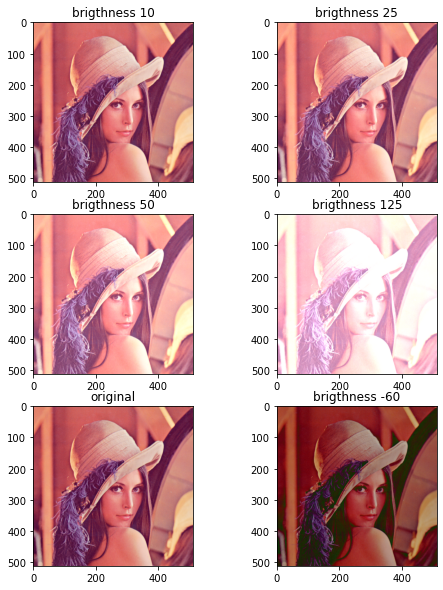

In [60]:
fig, axs = plt.subplots(3,2, figsize=(8, 10))
axs[0,0].imshow(change_image_brightness(brightness=10, image=image_bgr))
axs[0,0].set_title("brigthness 10")
axs[0,1].imshow(change_image_brightness(brightness=25, image=image_bgr))
axs[0,1].set_title("brigthness 25")
axs[1,0].imshow(change_image_brightness(brightness=50, image=image_bgr))
axs[1,0].set_title("brigthness 50")
axs[1,1].imshow(change_image_brightness(brightness=125, image=image_bgr))
axs[1,1].set_title("brigthness 125")
axs[2,0].imshow(image)
axs[2,0].set_title("original")
axs[2,1].imshow(change_image_brightness(brightness=-60, image=image_bgr))
axs[2,1].set_title("brigthness -60")

# Abdecken von Teilen des Bildes
## Blocken von Teilen des Bildes
Hierbei muss darauf geachtet werden, das die ROI des Schildes nicht vollständig geblockt wird

startpoint = (x1, y1) <br>
endpoint = (x2,y2) <br>
x1,y1 ------ <br>
|          | <br>
|          | <br>
|          | <br>
--------x2,y2 <br>
thickness beschreibt die Breite der Linie des Rechtecks, bei -1 wird das gesamte rechteck farblich gefüllt <br>
color = (BGR)

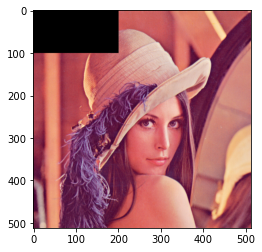

In [46]:
startpoint = (0,0)
endpoint = (200, 100)
color = (0,0,0)
thickness = -1
blocked_edge = cv2.rectangle(image, startpoint, endpoint, color=color, thickness=thickness)
plt.imshow(blocked_edge)

## Overlay stickers
available stickers for overlay are found in *../data/stickers/*. Some stickers have an alpha channel to include a transparent background, this is needed for non rectangular images. All images were cropped and edited in GIMP. Stickers were downloaded from google pictures.

In [48]:
sticker_folder_path = "../data/stickers/"
stickers = os.listdir(sticker_folder_path)
print(stickers)

['trasher-white.png', 'fod.png', 'new-horizon.png', 'iraqistan.png', 'trasher-black.png', 'Hamburg.png', 'british-flag.png', 'multi-stickers.png', 'caution.png']


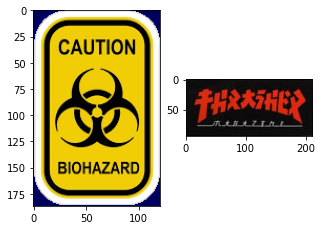

In [72]:
sticker_caution = cv2.imread(f"{sticker_folder_path}{stickers[8]}", -1)
sticker_trasher_black = cv2.imread(f"{sticker_folder_path}{stickers[4]}", -1)

sticker_caution_rgb = cv2.cvtColor(sticker_caution, cv2.COLOR_BGR2RGB)
sticker_trasher_black_RGB = cv2.cvtColor(sticker_trasher_black, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1,2, figsize=(5,5))
axs[0].imshow(sticker_caution_rgb)
axs[1].imshow(sticker_trasher_black_RGB)

In [69]:
def overlay_sticker(image, sticker):
    x_offset=y_offset=50

    image_with_overlay = image.copy()

    #calculate x and y coordinates to draw sticker
    y1, y2 = y_offset, y_offset + sticker.shape[0]
    x1, x2 = x_offset, x_offset + sticker.shape[1]

    # load aplha channel info from images
    alpha_s = sticker[:, :, 3] / 255.0
    alpha_l = 1.0 - alpha_s

    # draw sticker to image
    for c in range(0, 3):
        image_with_overlay[y1:y2, x1:x2, c] = (alpha_s * sticker[:, :, c] + alpha_l * image_with_overlay[y1:y2, x1:x2, c])
    return image_with_overlay

(187, 121, 4)
(512, 512, 3)


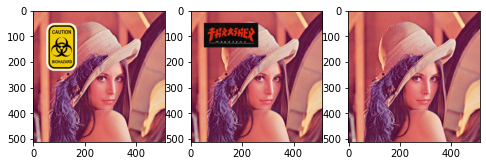

In [73]:
print(sticker_caution.shape)
print(image_bgr.shape)

fig, axs = plt.subplots(1,3, figsize=(8,5))
axs[0].imshow(cv2.cvtColor(overlay_sticker(image=image_bgr, sticker=sticker_caution), cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(overlay_sticker(image=image_bgr, sticker=sticker_trasher_black), cv2.COLOR_BGR2RGB))
axs[2].imshow(image)